In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Auto Regression

In [3]:
from statsmodels.tsa.ar_model import AR, ARResults

In [4]:
df = pd.read_csv('G:/Education/Machine Learning/Time Series ( ALL TECHNIQUES )/UDEMY_TSA_FINAL/Data/uspopulation.csv', index_col = 'DATE', parse_dates=True)
df.index.freq = "MS"
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


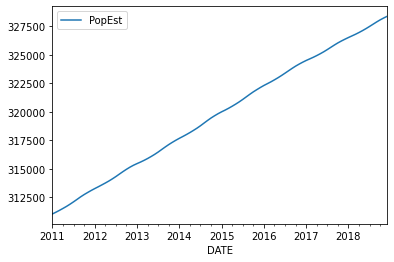

In [5]:
df.plot()

In [6]:
len(df)

96

In [7]:
df_train = df.iloc[:84]
df_test = df.iloc[84:]

In [8]:
df_train.count()

PopEst    84
dtype: int64

In [9]:
df_test.count()

PopEst    12
dtype: int64

## Considering 1 month lag

In [10]:
model = AR(df_train['PopEst'])

In [11]:
ARfit_1 = model.fit(maxlag = 1) # Parameters can be updated depending on the situation of dataset #

In [12]:
ARfit_1.k_ar # Displays how many lags we provided #

1

In [13]:
ARfit_1.params # Displays coefficient and constant #

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [14]:
start = len(df_train)
end = len(df_train)+len(df_test)-1

In [15]:
print('start: ', start)
print('end: ', end)

start:  84
end:  95


In [16]:
predictions1 = ARfit_1.predict(start = start , end = end)

In [17]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [18]:
predictions1 = predictions1.rename('AR order 1')

In [19]:
predictions1.count()

12

In [20]:
df_test.count()

PopEst    12
dtype: int64

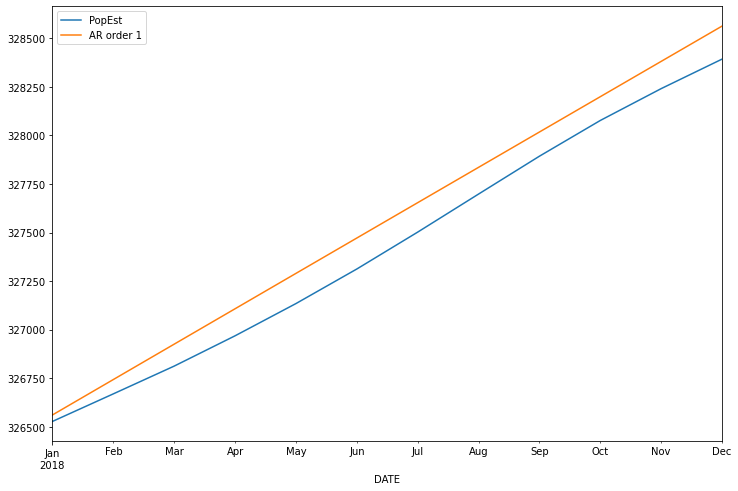

In [21]:
df_test.plot(figsize = (12,8), legend = True)
predictions1.plot(legend = True)

## Increasing 1month lag to 2 months

In [22]:
model2 = AR(df_train['PopEst'])

In [23]:
ARfit_2 = model2.fit(maxlag=2)

In [24]:
ARfit_2.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [25]:
predictions2 = ARfit_2.predict(start = start, end = end)

In [26]:
predictions2 = predictions2.rename('AR order 2')

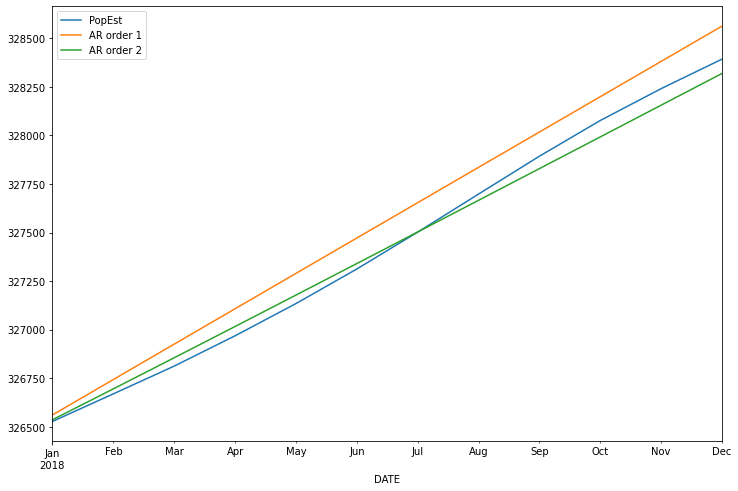

In [27]:
df_test.plot(figsize = (12,8), legend = True)
predictions1.plot(legend = True)
predictions2.plot(legend = True)

## Without any lag

In [28]:
model3 = AR(df_train['PopEst'])

In [29]:
ARfit = model3.fit(ic = 't-stat')

In [30]:
ARfit.params # Displays the number of lags to perform well. #

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [31]:
predictions3 = ARfit.predict(start, end)
predictions3 = predictions3.rename('AR order 3')

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
labels = ['AR1', 'AR2', 'AR']
preds = [predictions1, predictions2, predictions3]

In [34]:
for i in range(3):
    error = mean_squared_error(df_test['PopEst'],preds[i])
    print(f'{labels[i]} MSE was : {error}')

AR1 MSE was : 17449.714238316246
AR2 MSE was : 2713.258660776706
AR MSE was : 186.97381676516724


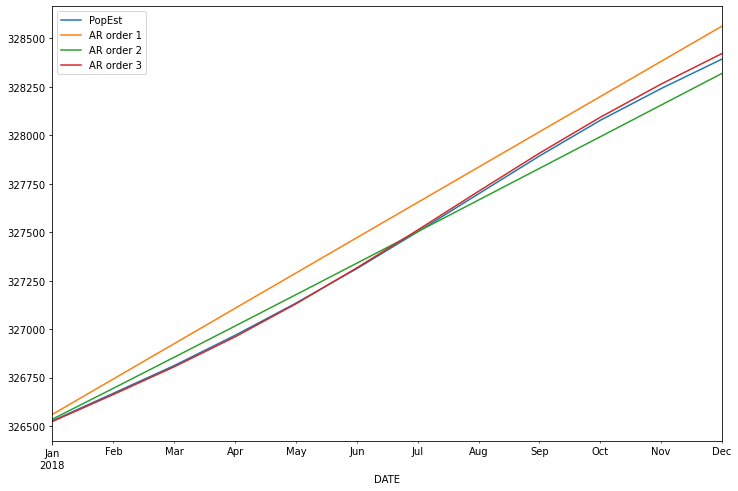

In [35]:
df_test.plot(figsize = (12,8), legend = True)
predictions1.plot(legend = True)
predictions2.plot(legend = True)
predictions3.plot(legend = True)

In [36]:
# Forecasting in future
model = AR(df['PopEst'])
ARfit_forecast = model.fit()
forecasted_values = ARfit_forecast.predict(start = len(df), end = len(df) + 24).rename('Forecast') # predicting 24 months(2years) #

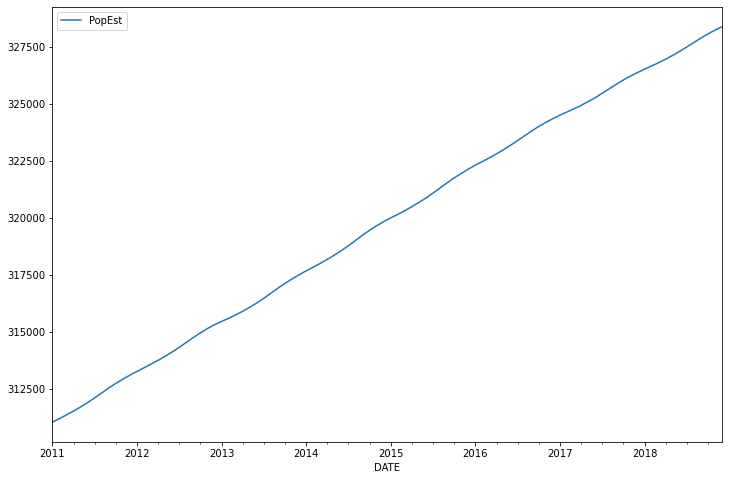

In [37]:
df['PopEst'].plot(figsize = (12,8), legend = True)

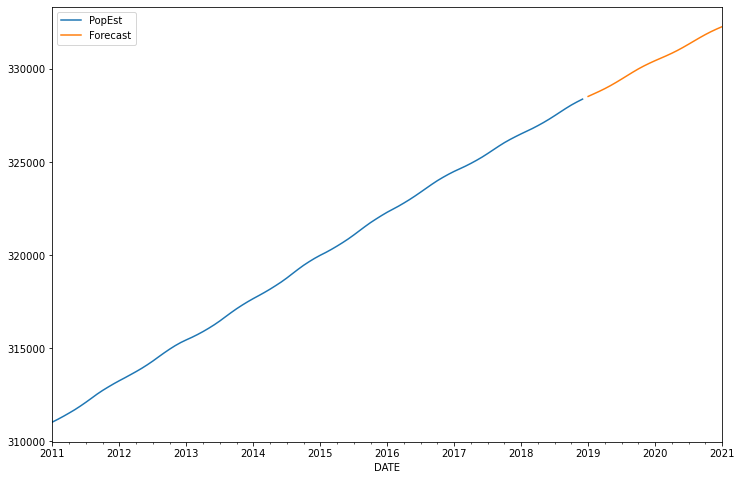

In [39]:
df['PopEst'].plot(figsize = (12,8), legend = True)
forecasted_values.plot(legend = True)